### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.dirname(os.getcwd()))
sys.path.append(os.getcwd())

import constants
from data_classes.MathDataLoader import MathDataLoader
from data_classes.MathProblem import MathProblem
from llm_agents.ChainOfThoughtMathSolver import ChainOfThoughtMathSolver

### Testing the MATH Dataset

In [2]:
math_data_loader = MathDataLoader(data_dir=constants.MATH_DATASET_DIR)

math_problems = math_data_loader.get_random_problems_balanced(n_problems_per_level_and_type=4)
print(f"Loaded {len(math_problems)} problems for evaluation")
# math_data_loader.save_problems(math_problems, constants.MATH_RANDOM_PROBLEM_EVAL_DIR)

Loaded 5000 math problems from 7 problem types
Loaded 140 problems for evaluation


In [3]:
# results = math_data_loader.test_random_problems(math_solver, n_problems=10, level=1, verbose=True)

### Running MACM

In [4]:
import utils
if not os.getenv("OPENAI_API_KEY") or  not os.getenv("TAVILY_API_KEY"):
    os.environ["OPENAI_API_KEY"] = utils.get_openai_api_key()
    os.environ["TAVILY_API_KEY"] = utils.get_tavily_api_key()

In [5]:
run_raw_macm = False

if run_raw_macm:
    sys.path.append(os.path.abspath("MACM/"))

    from MACM.main import main as main_macm

    n = 1 # verification times
    times = 5 # The upper limit of the mining times
    min_voters = 1 # min number of voters
    max_voters = 3 # max number of voters
    problem_statement = random_problem.problem_statement

    main_macm(problem_statement, times, n, min_voters, max_voters, verbose=True)  # Assuming these are defined elsewhere

### Test Dataset on Single Agent

In [6]:
math_solver = ChainOfThoughtMathSolver()

math_problems = math_data_loader.load_problems(constants.MATH_RANDOM_PROBLEM_EVAL_DIR)

print(f'Math Problems to Evaluate: {[p.get_id() for p in math_problems]}')
results = math_data_loader.test_math_parallel(math_solver, math_problems, max_workers=8)
print(results)
math_data_loader.save_results(results, constants.MATH_SINFGLE_AGENT_EVAL_DIR)

Math Problems to Evaluate: ['Counting & Probability_57', 'Algebra_1911', 'Prealgebra_1405', 'Prealgebra_1909', 'Prealgebra_1634', 'Precalculus_1276', 'Algebra_405', 'Number Theory_1218', 'Intermediate Algebra_2115', 'Geometry_171', 'Algebra_276', 'Prealgebra_1591', 'Intermediate Algebra_1779', 'Intermediate Algebra_1137', 'Counting & Probability_695', 'Algebra_1707', 'Algebra_455', 'Algebra_2066', 'Algebra_1213', 'Intermediate Algebra_150', 'Prealgebra_1418', 'Intermediate Algebra_1020', 'Prealgebra_1445', 'Number Theory_328', 'Number Theory_497', 'Intermediate Algebra_1582', 'Precalculus_814', 'Prealgebra_807', 'Algebra_1781', 'Prealgebra_965', 'Prealgebra_1233', 'Algebra_661', 'Algebra_919', 'Prealgebra_2057', 'Prealgebra_1727', 'Algebra_425', 'Precalculus_924', 'Prealgebra_1937', 'Geometry_817', 'Number Theory_590', 'Counting & Probability_575', 'Algebra_2762', 'Intermediate Algebra_1597', 'Number Theory_252', 'Geometry_594', 'Number Theory_221', 'Algebra_636', 'Prealgebra_1123', 'P

### LangChain MACM

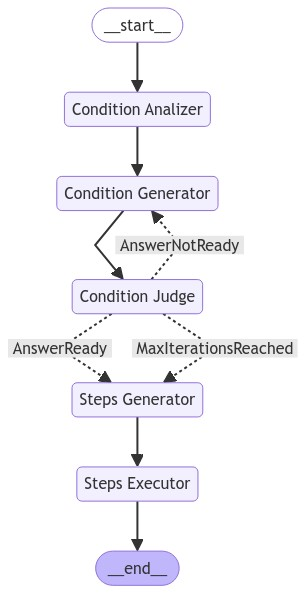

In [7]:
from langgraphs.macm import get_macm_graph
from IPython.display import Image, display

graph = get_macm_graph()
app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png())) 

def macm(math_problem):
    graph = get_macm_graph()
    app = graph.compile()
    
    config = {"recursion_limit": 50}
    inputs = {
        "math_problem": math_problem,
        "current_iterations": 0,
        "max_iterations": 5,
        "verified_conditions": [],
        "unverified_conditions": [],
        "objectives": [],
        "steps": [],
        "final_answer": None
    }

    for event in app.stream(inputs, config=config):
        pass
        # print_dict(event)
    
    last_event_name = list(event.keys())[0]
    return event[last_event_name]['final_answer']

#### Single Problem

In [6]:
response = macm(random_problem)
print(response)
random_problem.is_correct_answer(response, verbose=True)

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  5


KeyboardInterrupt: 

#### Multiple Problems in Parallel

In [8]:
# math_problems = math_data_loader.get_random_problems(n_problems=100)
math_problems = math_data_loader.load_problems(constants.MATH_RANDOM_PROBLEM_EVAL_DIR)
print(f'Math Problems to Evaluate: {[p.get_id() for p in math_problems]}')
results = math_data_loader.test_math_parallel(macm, math_problems, max_workers=8)
print(results)
math_data_loader.save_results(results, constants.MATH_MACM_EVAL_DIR)

Math Problems to Evaluate: ['Counting & Probability_57', 'Algebra_1911', 'Prealgebra_1405', 'Prealgebra_1909', 'Prealgebra_1634', 'Precalculus_1276', 'Algebra_405', 'Number Theory_1218', 'Intermediate Algebra_2115', 'Geometry_171', 'Algebra_276', 'Prealgebra_1591', 'Intermediate Algebra_1779', 'Intermediate Algebra_1137', 'Counting & Probability_695', 'Algebra_1707', 'Algebra_455', 'Algebra_2066', 'Algebra_1213', 'Intermediate Algebra_150', 'Prealgebra_1418', 'Intermediate Algebra_1020', 'Prealgebra_1445', 'Number Theory_328', 'Number Theory_497', 'Intermediate Algebra_1582', 'Precalculus_814', 'Prealgebra_807', 'Algebra_1781', 'Prealgebra_965', 'Prealgebra_1233', 'Algebra_661', 'Algebra_919', 'Prealgebra_2057', 'Prealgebra_1727', 'Algebra_425', 'Precalculus_924', 'Prealgebra_1937', 'Geometry_817', 'Number Theory_590', 'Counting & Probability_575', 'Algebra_2762', 'Intermediate Algebra_1597', 'Number Theory_252', 'Geometry_594', 'Number Theory_221', 'Algebra_636', 'Prealgebra_1123', 'P

### LangChain Multi-MACM

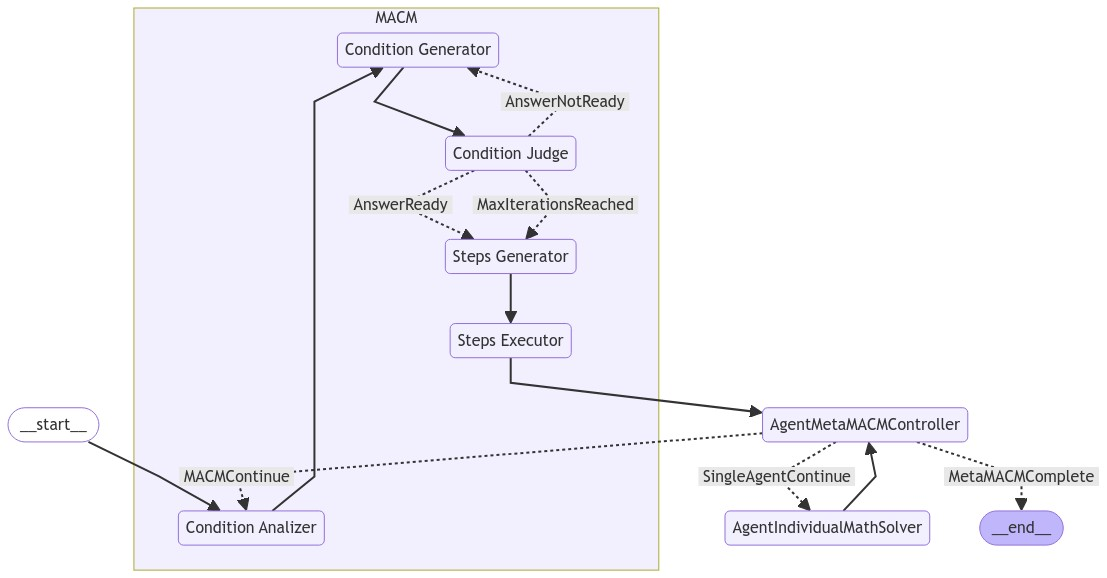

In [9]:
from langgraphs.multi_macm import get_multi_macm_graph
from IPython.display import Image, display

graph = get_multi_macm_graph()
app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png())) 

def multi_macm(math_problem):
    graph = get_multi_macm_graph()
    app = graph.compile()
    
    config = {"recursion_limit": 50}
    inputs = {
        "math_problem": math_problem,
        "max_iterations": 5,
        "current_iterations": 0,
        "verified_conditions": [],
        "unverified_conditions": [],
        "objectives": [],
        "steps": [],
        "final_answer": None, 
        "final_answers": {},
        "current_meta_iterations": 0,
        "n_multi_agent_iterations": 3, 
        "multi_agent_completed": False
    }

    for event in app.stream(inputs, config=config):
        pass
        # print_dict(event)
    
    last_event_name = list(event.keys())[0]
    final_answers = event[last_event_name]['final_answers']
    best_answer = max(final_answers, key=final_answers.get)
    return best_answer

#### Single Problem

In [ ]:
response = multi_macm(random_problem)
print(response)
random_problem.is_correct_answer(response, verbose=True)

#### Multiple Problems in Parallel

In [10]:
# math_problems = math_data_loader.get_random_problems(n_problems=100)
# math_problems_2 = math_data_loader.get_random_problems(n_problems=50)
math_problems = math_data_loader.load_problems(constants.MATH_RANDOM_PROBLEM_EVAL_DIR)
print(f'Math Problems to Evaluate: {[p.get_id() for p in math_problems]}')
results = math_data_loader.test_math_parallel(multi_macm, math_problems, max_workers=8)
print(results)
math_data_loader.save_results(results, constants.MATH_MULTI_MACM_EVAL_DIR)

Math Problems to Evaluate: ['Counting & Probability_57', 'Algebra_1911', 'Prealgebra_1405', 'Prealgebra_1909', 'Prealgebra_1634', 'Precalculus_1276', 'Algebra_405', 'Number Theory_1218', 'Intermediate Algebra_2115', 'Geometry_171', 'Algebra_276', 'Prealgebra_1591', 'Intermediate Algebra_1779', 'Intermediate Algebra_1137', 'Counting & Probability_695', 'Algebra_1707', 'Algebra_455', 'Algebra_2066', 'Algebra_1213', 'Intermediate Algebra_150', 'Prealgebra_1418', 'Intermediate Algebra_1020', 'Prealgebra_1445', 'Number Theory_328', 'Number Theory_497', 'Intermediate Algebra_1582', 'Precalculus_814', 'Prealgebra_807', 'Algebra_1781', 'Prealgebra_965', 'Prealgebra_1233', 'Algebra_661', 'Algebra_919', 'Prealgebra_2057', 'Prealgebra_1727', 'Algebra_425', 'Precalculus_924', 'Prealgebra_1937', 'Geometry_817', 'Number Theory_590', 'Counting & Probability_575', 'Algebra_2762', 'Intermediate Algebra_1597', 'Number Theory_252', 'Geometry_594', 'Number Theory_221', 'Algebra_636', 'Prealgebra_1123', 'P

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionAnalyzer
In AgentConditionAnalyzer
In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.
CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionAnalyzer
In AgentConditionAnalyzer
In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentNumericalSt

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentStepsExecutor
Final Answer: \boxed{-5.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \(\boxed{180.7484439767048}\)

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{2001.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{56.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{[-2.356194490192345, 2.356194490192345]}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionJudge
In AgentNumericalStepsGenerationIn AgentConditionJudge

In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentNumericalStepsGeneration
Final Answer: \(\boxed{180.7484439767048}\)

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{180.76}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In 

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{-5.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionAnalyzer
Final Answer: \boxed{-5.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 2/50. Correct: True, Agent Answer: \boxed{-5.0}, Real Answer: \boxed{-5}

-----------------------------------

In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentStepsExecutor
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{0.0769}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
Final Answer: \boxed{56.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentStepsExecutor
In AgentNumericalStepsGeneration
Final Answer: \boxed{56.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentStepsExecutor
Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  2 

Final Answer: \boxed{2001.0}
In ChainOfThoughtMathSolver

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
Final Answer: \boxed{56.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 3/50. Correct: True

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge
Final Answer: \boxed{574.571}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{[-2.356194490192345, 2.356194490192345]}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
Final Answer: \boxed{574.571}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 4/50. Correct: False, Agent Answer: \boxed{2001.0}, Real Answer: \boxed{575}

-----------------------------------

Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentStepsExecutor
Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 5/50. Correct: True, Agent Answer: \boxed{2.0}, Real Answer: \boxed{2}

-----------------------------------

Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{(-2.356, 2.356)}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 6/50. Correct: True, Agent Answer: \boxed{11.0}, Real Answer: \boxed{11}

-----------------------------------

In AgentAnswerReadyJudge
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{4.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{(-2.356, 2.356)}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 7/50. Correct: False, Agent Answer: \boxed{[-2.356194490192345, 2.356194490192345]}, Real Answer: \boxed{\left[ -\frac{\pi}{2}, \frac{\pi}{2} \right]}

-----------------------------------



CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{4.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{12.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentStepsExecutor
Final Answer: \boxed{4.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
Final Answer: \boxed{102.0}

In AgentMetaMACMController at iteration  1 



CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{200.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{8.0}


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.



In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{4.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 8/50. Correct: True, Agent Answer: \boxed{4.0}, Real Answer: \boxed{4}

-----------------------------------

In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge
Final Answer: \boxed{0.0769}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentNumericalStepsGeneration
Final Answer: \boxed{0.076923}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentConditionJudge
Final Answer: \boxed{0.076923}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 9/50. Correct: False, Agent Answer: \boxed{0.0769}, Real Answer: \boxed{\frac{1}{13}}

-----------------------------------

In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentStepsExecutor
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentConditionJudge
In AgentStepsExecutor
Final Answer: \boxed{8.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
Final Answer: \boxed{102.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{27.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{200.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
Final Answer: \boxed{8.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{203.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
Final Answer: \boxed{200.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{8.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 10/50. Correct: True, Agent Answer: \boxed{8.0}, Real Answer: \boxed{8}

-----------------------------------

In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{203.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 11/50. Correct: False, Agent Answer: \boxed{102.0}, Real Answer: \boxed{203}

-----------------------------------

In AgentConditionJudge
Final Answer: \boxed{200.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 12/50. Correct: True, Agent Answer: \boxed{200.0}, Real Answer: \boxed{200}

-----------------------------------

In AgentStepsExecutor


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{12.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{0.0}

In AgentMetaMACMController at iteration  1 

Final Answer: \boxed{12.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
Final Answer: \boxed{12.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 13/50. Correct: True, Agent Answer: \boxed{12.0}, Real Answer: \boxed{12}

-----------------------------------



CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 14/50. Correct: True, Agent Answer: \boxed{3.0}, Real Answer: \boxed{3}

-----------------------------------

In AgentNumericalStepsGeneration
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{2.0x - 1.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{0.2}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{111111111.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentNumericalStepsGeneration
Final Answer: \boxed{27.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{6.28028478 \times 10^8}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentStepsExecutor
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{(5.0-10.0j)}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{27.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 15/50. Correct: True, Agent Answer: \boxed{3.0}, Real Answer: \boxed{3}

-----------------------------------

In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionAnalyzer
In AgentStepsExecutor
Final Answer: \boxed{5.656854249492381}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{27.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 16/50. Correct: True, Agent Answer: \boxed{27.0}, Real Answer: \boxed{27}

-----------------------------------

In AgentAnswerReadyJudge
Final Answer: \boxed{8.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  1  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge
Final Answer: \boxed{2.0x - 1.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
Final Answer: \boxed{8.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionJudge
Final Answer: \boxed{2.0x - 1.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 17/50. Correct: False, Agent Answer: \boxed{2.0x - 1.0}, Real Answer: \boxed{2x-1}

-----------------------------------

In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{12.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 18/50. Correct: False, Agent Answer: \boxed{0.0}, Real Answer: \boxed{15}

-----------------------------------

In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
Final Answer: \boxed{0.2}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionJudge
Final Answer: \boxed{0.2}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{0.2}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 19/50. Correct: False, Agent Answer: \boxed{0.2}, Real Answer: \boxed{\dfrac{1}{5}}

-----------------------------------



CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{40.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentStepsExecutor
Final Answer: \boxed{111111111.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
Final Answer: \boxed{111111111.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \[ \boxed{6.0} \]

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{111111111.0}In AgentNumericalStepsGeneration


In AgentMetaMACMController at iteration  2 

Completed Tasks: 20/50. Correct: False, Agent Answer: \boxed{111111111.0}, Real Answer: \boxed{111, \! 111, \! 111}

-----------------------------------

In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentStepsExecutor


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentConditionJudge
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{556.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{11, -3 + 6i}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionJudge
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{628028478.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
Final Answer: \boxed{11, -3 + 6i}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 21/50. Correct: False, Agent Answer: \boxed{11, -3 + 6i}, Real Answer: \boxed{-3 + 6i}

-----------------------------------

In AgentAnswerReadyJudge
Final Answer: \boxed{40.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{40.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentStepsExecutor
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{47188.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{40.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 22/50. Correct: True, Agent Answer: \boxed{40.0}, Real Answer: \boxed{40}

-----------------------------------

In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \[ \boxed{6.0} \]

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{1.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{26.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{47188.0}
Final Answer: \boxed{6.0}

In AgentMetaMACMController at iteration  2 


In AgentMetaMACMController at iteration  1 

Completed Tasks: 23/50. Correct: False, Agent Answer: \boxed{47188.0}, Real Answer: \boxed{49896}

-----------------------------------

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{6.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 24/50. Correct: True, Agent Answer: \boxed{6.0}, Real Answer: \boxed{6}

-----------------------------------

In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentConditionJudge
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentConditionJudge
Final Answer: \boxed{-0.619}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
Final Answer: \boxed{123.123123123}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{-3.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
Final Answer: \boxed{1122109}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 25/50. Correct: True, Agent Answer: \boxed{556.0}, Real Answer: \boxed{556}

-----------------------------------

In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{135.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{1.7320508075688772}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{36.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
Error in test_math_task: 1 validation error for SummarizedCondition
reasoning
  str type expected (type=type_error.str)
In AgentConditionJudge
Final Answer: \boxed{26.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionJudge
In AgentConditionJudge
Final Answer: \boxed{26.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge
In AgentConditionJudge
Final Answer: \boxed{26.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 26/50. Correct: True, Agent Answer: \boxed{26.0}, Real Answer: \boxed{26}

-----------------------------------

In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentStepsExecutor
In AgentConditionJudge
Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
Final Answer: \boxed{-3.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionJudge
Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{7.5}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
Final Answer: \boxed{-3.0}
In AgentStepsExecutor

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 27/50. Correct: True, Agent Answer: \boxed{10.0}, Real Answer: \boxed{10}

-----------------------------------

In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{-3.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 28/50. Correct: True, Agent Answer: \boxed{-3.0}, Real Answer: \boxed{-3}

-----------------------------------

In AgentConditionAnalyzer
Final Answer: \boxed{12.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{36.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentStepsExecutor
Final Answer: \boxed{36.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 29/50. Correct: True, Agent Answer: \boxed{36.0}, Real Answer: \boxed{36}

-----------------------------------

In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
Final Answer: \boxed{1.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{135.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{1.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{90.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
Final Answer: \boxed{1.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 30/50. Correct: True, Agent Answer: \boxed{1.0}, Real Answer: \boxed{1}

-----------------------------------

In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  1  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentConditionJudge
Final Answer: \boxed{1.7320508075688772}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentAnswerReadyJudge
Final Answer: \boxed{18.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionJudge
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
In AgentConditionGenerator ,current iteration:  1  max iterations:  2
Final Answer: \boxed{6.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{-128.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionJudge
In AgentStepsExecutor
Final Answer: \boxed{6.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 31/50. Correct: False, Agent Answer: \boxed{1.7320508075688772}, Real Answer: \boxed{3 \sqrt{3}}

-----------------------------------

In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentStepsExecutor
In AgentConditionAnalyzer
Final Answer: \boxed{7.5}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentAnswerReadyJudge
Final Answer: \boxed{7.5}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \[ \boxed{110.0} \]

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentStepsExecutor
Final Answer: \boxed{7.5}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 32/50. Correct: True, Agent Answer: \boxed{7.5}, Real Answer: \boxed{7.5}

-----------------------------------

In AgentStepsExecutor
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{135.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
Final Answer: \boxed{90.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentConditionJudge
Final Answer: \boxed{135.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{90.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
Final Answer: \boxed{135.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 33/50. Correct: True, Agent Answer: \boxed{135.0}, Real Answer: \boxed{135}

-----------------------------------

Final Answer: \boxed{90.0}

In AgentMetaMACMController at iteration

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{18.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentNumericalStepsGenerationIn AgentAnswerReadyJudge

Final Answer: \boxed{18.0}
In AgentConditionGenerator ,current iteration:  0  max iterations:  2

In AgentMetaMACMController at iteration  2 

Completed Tasks: 35/50. Correct: True, Agent Answer: \boxed{18.0}, Real Answer: \boxed{18}

-----------------------------------

Final Answer: \boxed{-128.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
Final Answer: \boxed{-128.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{-128.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 36/50. Correct: True, Agent Answer: \boxed{-128.0}, Real Answer: \boxed{-128}

-----------------------------------

In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{7.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentAnswerReadyJudge
Final Answer: \[ \boxed{16.0} \]

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionJudge
In AgentNumericalStepsGeneration
Final Answer: \boxed{140.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentStepsExecutor
Final Answer: \boxed{140.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 37/50. Correct: False, Agent Answer: \boxed{140.0}, Real Answer: \boxed{30^\circ}

-----------------------------------

In 

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentNumericalStepsGeneration
In AgentConditionAnalyzer
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentStepsExecutor


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{19.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionAnalyzer
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{15600.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentNumericalStepsGeneration
Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  1 



CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentStepsExecutor
In AgentStepsExecutor
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
Final Answer: \boxed{7.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentStepsExecutor
In AgentAnswerReadyJudge
Final Answer: \boxed{4.67}
In AgentStepsExecutor

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentNumericalStepsGeneration
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentNumericalStepsGeneration
Final Answer: \boxed{4.67}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 38/50. Correct: False, Agent Answer: \boxed{7.0}, Real Answer: \boxed{\frac{14}{3}}

-----------------------------------

Final Answer: \boxed{19.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtM

CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{54.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 39/50. Correct: True, Agent Answer: \boxed{3.0}, Real Answer: \boxed{3}

-----------------------------------

In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{19.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentConditionJudge
Final Answer: \boxed{32.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{19.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 40/50. Correct: True, Agent Answer: \boxed{19.0}, Real Answer: \boxed{19}

-----------------------------------

Final Answer: \boxed{12025.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
Final Answer: \boxed{12025.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 41/50. Correct: False, Agent Answer: \boxed{12025.0}, Real Answer: \boxed{15,600}

-----------------------------------

In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
Final Answer: \boxed{1.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
Final Answer: \boxed{1.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 42/50. Correct: False, Agent Answer: \boxed{2.0}, Real Answer: \boxed{1}

-----------------------------------

In AgentConditionJudge
In AgentAnswerReadyJudge
In AgentConditionJudge
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentStepsExecutor
In AgentAnswerReadyJudge
In AgentStepsExecutor
In AgentNumericalStepsGeneration
Final Answer: \boxed{54.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentNumericalStepsGeneration
In AgentConditionJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
Final Answer: \boxed{54.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
Final Answer: \boxed{4.82842712474619}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentStepsExecutor
In AgentConditionJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
Final Answer: \boxed{36.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 43/50. Correct: False, Agent Answer: \boxed{54.0}, Real Answer: \boxed{18^\circ}

-----------------------------------

Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{563.51}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
Final Answer: \boxed{10.0}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 44/50. Correct: False, Agent Answer: \boxed{10.0}, Real Answer: \boxed{(10,3)}

-----------------------------------

In AgentConditionGenerator ,current iteration:  0  max iterations:  2


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{3.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentConditionJudge
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentAnswerReadyJudge
In AgentStepsExecutor


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{2.5}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentAnswerReadyJudge
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentNumericalStepsGeneration


CallbackManager.merge(): Parent run IDs do not match. Using the parent run ID of the first callback manager.


Final Answer: \boxed{2.0}

In AgentMetaMACMController at iteration  1 

In AgentConditionAnalyzer
In AgentConditionJudge
In AgentNumericalStepsGeneration
In AgentConditionGenerator ,current iteration:  0  max iterations:  2
In AgentStepsExecutor
In AgentConditionJudge
In AgentStepsExecutor
In AgentConditionJudge
Final Answer: \boxed{563.51}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  2 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
In AgentAnswerReadyJudge
Final Answer: \boxed{563.51}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMathSolver
In AgentAnswerReadyJudge
Final Answer: \boxed{563.51}

In AgentMetaMACMController at iteration  2 

Completed Tasks: 45/50. Correct: True, Agent Answer: \boxed{563.51}, Real Answer: \boxed{563.51}

-----------------------------------

Final Answer: \boxed{11.0}

In AgentMetaMACMController at iteration  1 

In ChainOfThoughtMath

### LangChain Meta-MACM

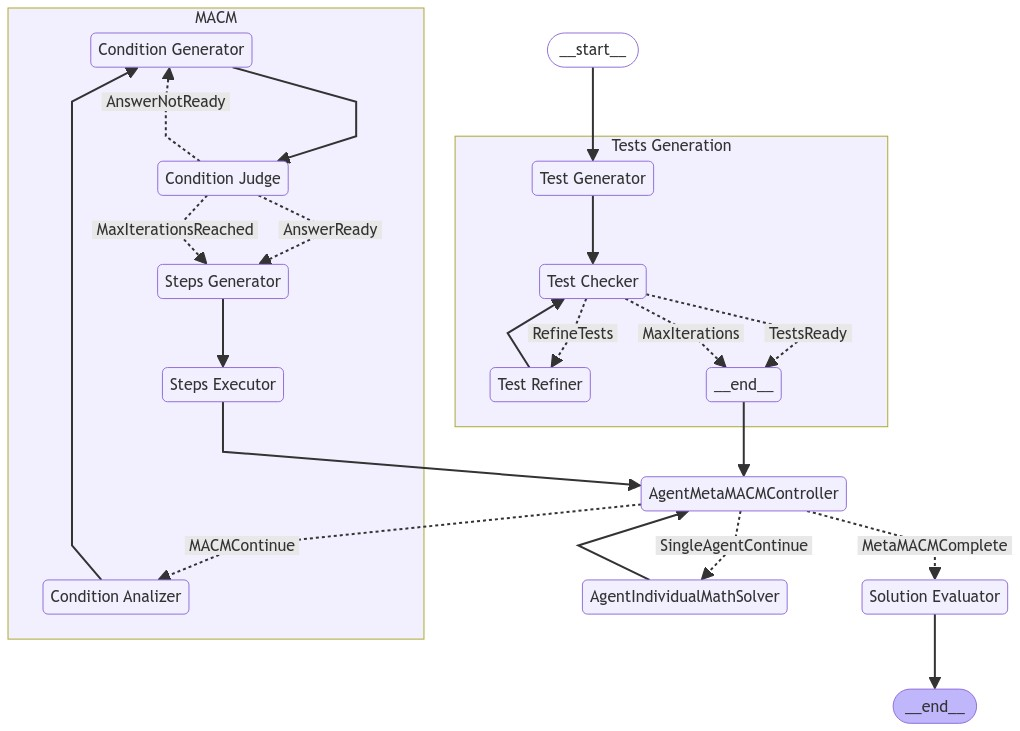

In [11]:
from langgraphs.meta_macm import get_meta_macm_graph
from IPython.display import Image, display

graph = get_meta_macm_graph()
app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png())) 

def meta_macm(math_problem):
    graph = get_meta_macm_graph()
    app = graph.compile()
    
    config = {"recursion_limit": 50}
    inputs = {
        "math_problem": math_problem,
        "max_iterations": 5,
        "current_iterations": 0,
        "verified_conditions": [],
        "unverified_conditions": [],
        "objectives": [],
        "steps": [],
        "final_answer": None, 
        "final_answers": {},
        "current_meta_iterations": 0,
        "n_multi_agent_iterations": 3, 
        "multi_agent_completed": False,
        "passed_tests_threshold": 0.7, 
    }

    for event in app.stream(inputs, config=config):
        pass
        # print_dict(event)
    
    last_event_name = list(event.keys())[0]
    final_answer = event[last_event_name]['final_answer']
    return final_answer

#### Single Problem

In [14]:
random_problem = math_data_loader.get_random_problem(level=3)

print(random_problem.problem_statement)
print(random_problem.answer)

Find $g(x)$, with terms in order of decreasing degree, if we have that \[8x^4-7x^2+8x-7+g(x)=x + 1.\]
\boxed{-8 x^4+7x^2-7x+8}


In [ ]:
response = meta_macm(random_problem)
print(response)
random_problem.is_correct_answer(response, verbose=True)

#### Multiple Problems in Parallel

In [ ]:
# math_problems = math_data_loader.get_random_problems(n_problems=3)
# math_problems_2 = math_data_loader.get_random_problems(n_problems=3)
math_problems = math_data_loader.load_problems(constants.MATH_RANDOM_PROBLEM_EVAL_DIR)
print(f'Math Problems to Evaluate: {[p.get_id() for p in math_problems]}')
results = math_data_loader.test_math_parallel(meta_macm, math_problems, max_workers=8)
print(results)
math_data_loader.save_results(results, constants.MATH_META_MACM_EVAL_DIR)

### Plotting Results

#### Radar Plot

In [23]:
import json
import plotly.graph_objects as go

def process_json(file_path):
    """
    Reads a JSON file and calculates the percentage of correct answers for each category.
    
    Parameters:
    file_path (str): The path to the JSON file.
    
    Returns:
    tuple: A tuple containing a list of categories and a list of percentages for correct answers.
    """
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    categories = list(data['test_counts_by_type'].keys())
    correct_counts = [data['test_counts_by_type'][category]["Correct"] for category in categories]
    error_counts = [data['test_counts_by_type'][category]["Error"] for category in categories]
    
    total_counts = [correct + error for correct, error in zip(correct_counts, error_counts)]
    percentages = [correct / total * 100 if total != 0 else 0 for correct, total in zip(correct_counts, total_counts)]
    
    return categories, percentages

def plot_radar_chart_from_jsons(json_files, labels, colors):
    """
    Plots a radar chart for multiple JSON files comparing performance by category.
    
    Parameters:
    json_files (list of str): A list of paths to the JSON files.
    labels (list of str): A list of labels for each dataset.
    colors (list of str): A list of colors for each dataset.
    """
    fig = go.Figure()

    # Assuming all JSONs have the same categories, we use the categories from the first file
    categories, _ = process_json(json_files[0])
    categories += [categories[0]]  # Closing the loop
    
    for file_path, label, color in zip(json_files, labels, colors):
        _, percentages = process_json(file_path)
        percentages += percentages[:1]  # Closing the loop
        
        fig.add_trace(go.Scatterpolar(
            r=percentages,
            theta=categories,
            fill='toself',
            name=label,
            line=dict(color=color)
        ))

    # Customize the layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        showlegend=True,
        title="Comparison of Performance by Category"
    )

    # Show the plot
    fig.show()

base_directory =  constants.RESULTS_DIR + "math/" + "gpt-4o-run-1/"  # Update this to your base directory
json_files = [
    base_directory + "single_agent/results.json",
    base_directory + "multi_macm/results.json",
    base_directory + "meta_macm/results.json"
]
labels = ['Single Agent', 'MACM', 'Meta MACM']
colors = ['blue', 'brown', 'orange']

plot_radar_chart_from_jsons(json_files, labels, colors)


#### Simple Bar Plot

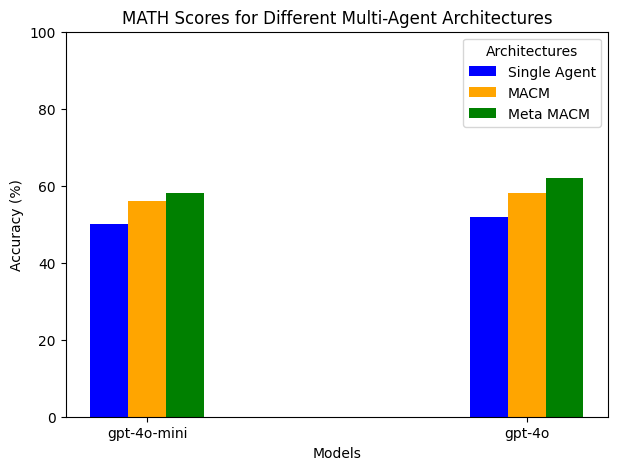

In [50]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_scores_from_jsons(base_directories, models, architectures, architecture_names, colors):
    """
    Plots a bar chart for the scores extracted from multiple JSON files for different models and architectures.
    
    Parameters:
    base_directories (list of str): A list of base directories corresponding to different models.
    models (list of str): A list of model names to be used as x-axis labels.
    architectures (list of str): A list of architecture names to be used in the legend.
    colors (list of str): A list of colors for each architecture.
    """
    scores = {arch: [] for arch in architectures}

    # Extract the score from each JSON file for each model and architecture
    for base_directory in base_directories:
        for arch, color in zip(architectures, colors):
            file_path = f"{base_directory}/{arch}/results.json"
            with open(file_path, 'r') as file:
                data = json.load(file)
                scores[arch].append(data['score'])

    # Create the bar plot
    x = np.arange(len(models))  # the label locations
    width = 0.1  # the width of the bars

    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Plot each architecture's scores
    for i, arch in enumerate(architectures):
        ax.bar(x + i*width, scores[arch], width, label=architecture_names[arch], color=colors[i])

    # Set the y-axis limits
    plt.ylim(0, 100)

    # Add labels and title
    ax.set_xlabel('Models')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('MATH Scores for Different Multi-Agent Architectures')
    ax.set_xticks(x + width)
    ax.set_xticklabels(models)

    # Add legend
    ax.legend(title="Architectures")

    # Show the plot
    plt.show()

# Example usage
base_directories = [
    constants.RESULTS_DIR + "math/" + "gpt-4o-mini-run-1",
    constants.RESULTS_DIR + "math/" + "gpt-4o-run-1",
]
models = ['gpt-4o-mini', 'gpt-4o']
architectures = ['single_agent', 'multi_macm', 'meta_macm']
architecture_names = {'single_agent': 'Single Agent', 'multi_macm': 'MACM', 'meta_macm': 'Meta MACM'}
colors = ['blue', 'orange', 'green']

plot_scores_from_jsons(base_directories, models, architectures, architecture_names, colors)
